In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# read data
df = pd.read_csv("test.csv")
df.drop(columns=df.columns[0], 
        axis=1, 
        inplace=True)

In [14]:
ls data

 Volume in drive C has no label.
 Volume Serial Number is FEB5-37D9

 Directory of C:\Users\hlu\Desktop\github\covid-learning\data

09/08/2021  11:08 AM    <DIR>          .
09/08/2021  11:08 AM    <DIR>          ..
07/27/2021  05:36 PM            13,560 districts_info.csv
09/08/2021  11:08 AM    <DIR>          engagement_data
07/27/2021  05:37 PM            44,683 products_info.csv
07/27/2021  05:36 PM             6,117 README.md
               3 File(s)         64,360 bytes
               3 Dir(s)  242,307,751,936 bytes free


In [12]:
districts = pd.read_csv('data/districts_info.csv')

districts.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
products = pd.read_csv('data/products_info.csv')
products.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [11]:
districts.groupby(by='state')['state'].count().sort_values()

state
Arizona                  1
North Dakota             1
Florida                  1
Minnesota                1
Texas                    2
Tennessee                2
New Jersey               2
Michigan                 2
New Hampshire            2
District Of Columbia     3
Wisconsin                3
North Carolina           4
Virginia                 4
Missouri                 6
Washington               6
Indiana                  7
New York                 8
Ohio                    11
California              12
Illinois                18
Massachusetts           21
Utah                    29
Connecticut             30
Name: state, dtype: int64

In [16]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
LP ID                         372 non-null int64
URL                           372 non-null object
Product Name                  372 non-null object
Provider/Company Name         371 non-null object
Sector(s)                     352 non-null object
Primary Essential Function    352 non-null object
dtypes: int64(1), object(5)
memory usage: 17.5+ KB


In [21]:
products['Sector(s)'].value_counts()

PreK-12                          170
PreK-12; Higher Ed; Corporate    115
PreK-12; Higher Ed                65
Corporate                          1
Higher Ed; Corporate               1
Name: Sector(s), dtype: int64

In [22]:
products['Primary Essential Function'].value_counts()

LC - Digital Learning Platforms                                              74
LC - Sites, Resources & Reference                                            47
LC - Content Creation & Curation                                             36
LC - Study Tools                                                             25
LC - Courseware & Textbooks                                                  18
LC - Sites, Resources & Reference - Games & Simulations                      18
LC/CM/SDO - Other                                                            16
LC - Sites, Resources & Reference - Digital Collection & Repository          15
CM - Classroom Engagement & Instruction - Classroom Management               11
LC - Sites, Resources & Reference - Streaming Services                        9
CM - Virtual Classroom - Video Conferencing & Screen Sharing                  7
SDO - Data, Analytics & Reporting - Site Hosting & Data Warehousing           6
LC - Study Tools - Q&A                  

In [67]:
# How does student engagement with different types of education technology change over the course of the pandemic?
file  = 'data/engagement_data/8815.csv'
engagement = pd.read_csv(file)
engagement['time'] = pd.to_datetime(engagement['time'])
from datetime import date
engagement['weekday'] = engagement['time'].apply(date.weekday)
engagement.head()

,time,lp_id,pct_access,engagement_index,weekday
0,2020-01-27,32213,100.00,3000.00,0
1,2020-02-25,90153,33.33,2666.67,1
2,2020-02-25,99916,0.00,NaN,1
3,2020-02-25,28504,0.00,NaN,1
4,2020-02-25,95731,33.33,333.33,1


In [27]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134926 entries, 0 to 134925
Data columns (total 4 columns):
time                134926 non-null object
lp_id               134926 non-null int64
pct_access          134926 non-null float64
engagement_index    103720 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.1+ MB


In [31]:
engagement.groupby(by='lp_id')['lp_id'].count().sort_values(ascending=False).head()

lp_id
95731    311
32213    311
90153    310
99916    310
28504    310
Name: lp_id, dtype: int64

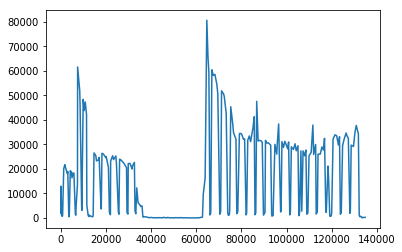

,time,weekday,engagement_index
0,2020-01-27,0,3000.00
6,2020-02-26,2,1750.00
61,2020-02-27,3,12947.27
461,2020-02-28,4,892.04
670,2020-02-29,5,643.35
810,2020-03-01,6,1121.12
1303,2020-03-02,0,20096.50
1800,2020-03-03,1,21718.99
2019,2020-03-04,2,20748.48
2913,2020-03-05,3,18106.88


In [71]:
lp_id = 32213
engagement[engagement['lp_id'] == lp_id]['engagement_index'].plot()
plt.show()

from datetime import date
engagement[engagement['lp_id'] == lp_id][['time','weekday','engagement_index']]

# findings: (i) significant drop on online learning tool usage during weekends